In [100]:
%matplotlib inline

import matplotlib
import numpy as np
import matplotlib.pyplot as plt

import json
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import pandas as pd
import scipy
from scipy.stats import ttest_ind, ttest_ind_from_stats
from scipy.special import stdtr

In [101]:
FILE_PATH = 'data/entries.json'

all_entries = []
with open(FILE_PATH) as file:
    for line in file:
        entry = json.loads(line)
        all_entries.append(entry)
len(all_entries)

318

In [102]:
control_start, exp_start = [], []
control_finish, exp_finish = [], []
starts = [control_start, exp_start]
finishes = [control_finish, exp_finish]

for entry in all_entries:
    if isinstance(entry['data'], dict):
        condition = entry['data']['conditionNumber']
        starts[condition].append(entry)
    else:
        condition = entry['data'][0]['conditionNumber']
        finishes[condition].append(entry)

print(len(control_start), len(exp_start))
print(len(control_finish), len(exp_finish))


86 81
73 78


In [103]:
contol_aha, control_pleasant, control_correct = [], [], []
for entry in control_finish:
    entry_data = entry['data']
        
    correct = 0 #number of correct answers
    answers = ['organic', 'naughty', 'hammock', 'durable']
    for n in [4,7,10,13]:
        ans = entry_data[n]['responses'] #get people's answer here 
        for k in [0,1,2,3]:
            if answers[k].lower() in ans.lower():
                correct = correct+1 #get total number of anagrams people got correct here
        
    rating = entry_data[17]['responses'] #did they get the correct answer for test anagram here
    
    if int(rating[6]) > 0 and correct < 2 : #only get data if they got the last anagram and remove people if they got all answers correct
    
        rating = entry_data[19]['responses'] #aha response here
        contol_aha.append(rating[6])
        rating = entry_data[18]['responses'] #pleasant response here
        control_pleasant.append(rating[6])
        control_correct.append(correct)
    else:
        continue
            
exp_aha, exp_pleasant, exp_correct = [], [], []         
for entry in exp_finish:
    entry_data = entry['data']
    
    correct = 0 #number of correct answers
    answers = ['door', 'bulk', 'pint', 'sort', 'rots']
    for n in [4,7,10,13]:
        ans = entry_data[n]['responses'] #get people's answer here 
        for k in [0,1,2,3,4]:
            if answers[k].lower() in ans.lower():
                correct = correct+1 #get total number of anagrams people got correct here
        
    rating = entry_data[17]['responses'] #did they get the correct answer for last anagram here
    
    if int(rating[6]) > 0 and correct > 3: #only get data if they got the last anagram and remove people if they didnt get a single answer correct
    
        rating = entry_data[19]['responses'] #aha response here
        exp_aha.append(rating[6])
        rating = entry_data[18]['responses'] #pleasant response here
        exp_pleasant.append(rating[6])
        exp_correct.append(correct)
    else:
        continue   
        
def clean(values):
    return [int(value)+1 for value in values]

contol_aha = clean(contol_aha)
control_pleasant = clean(control_pleasant)
exp_aha, exp_pleasant = clean(exp_aha), clean(exp_pleasant)
          
print(len(contol_aha), len(exp_aha))
#print(len(exp_aha), len(exp_pleasant))

44 60


4.068181818181818 3.966666666666667


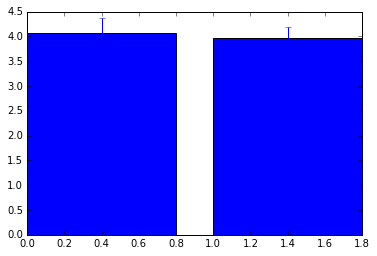

0.05064326042622729


In [104]:
control_aha_mean = np.mean(contol_aha)
control_aha_error = stats.sem(contol_aha)
exp_aha_mean = np.mean(exp_aha)
exp_aha_error = stats.sem(exp_aha)

plt.bar(
    np.arange(2),
    [control_aha_mean, exp_aha_mean],
    yerr=[control_aha_error, exp_aha_error]
)

print(control_aha_mean, exp_aha_mean)

plt.show()

print((control_aha_mean-exp_aha_mean)/np.std(contol_aha))


In [89]:
t, p = ttest_ind(contol_aha, exp_aha)
print(t, p)

0.26360327430867225 0.7925415514322702


4.4772727272727275
4.066666666666666


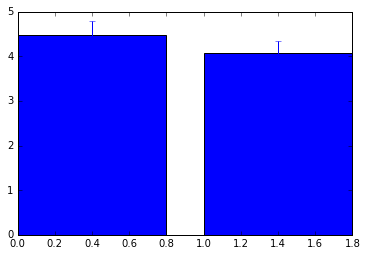

In [105]:
control_pleasant_mean = np.mean(control_pleasant)
control_pleasant_error = stats.sem(control_pleasant)
exp_pleasant_mean = np.mean(exp_pleasant)
exp_pleasant_error = stats.sem(exp_pleasant)

print(control_pleasant_mean)
print(exp_pleasant_mean)

plt.bar(
    np.arange(2),
    [control_pleasant_mean, exp_pleasant_mean],
    yerr=[control_pleasant_error, exp_pleasant_error]
)
plt.show()

In [91]:
t, p = ttest_ind(control_pleasant, exp_pleasant, equal_var=False)
print(t, p)

0.8148259020867338 0.41687897753275927


[[ 1.         -0.09269182]
 [-0.09269182  1.        ]]
[[1.         0.17743882]
 [0.17743882 1.        ]]


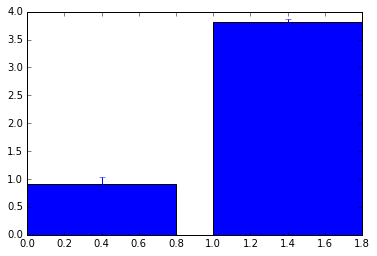

In [47]:
control_correct_mean = np.mean(control_correct)
control_correct_error = stats.sem(control_correct)
exp_correct_mean = np.mean(exp_correct)
exp_correct_error = stats.sem(exp_correct)

plt.bar(
    np.arange(2),
    [control_correct_mean, exp_correct_mean],
    yerr=[control_correct_error, exp_correct_error]
)

print(np.corrcoef([control_correct], [contol_aha]))
print(np.corrcoef([exp_correct], [exp_aha]))